# Limpieza de datos (Data cleansing)

### Agenda
1. Estandarización de NA´s.
2. Identificación de patrones.
3. Métodos para tratamientos de NA's.
    1.  Eliminación
    2.  Imputación
        1. Medias
        2. Computación de valores aleatorios
        3. Modelos predictivos
        4. Comparación predictiva de medias
        5. Automámica
4. Tratamiento de valores duplicados
5. Tratamiento de Outliers
    1. Identificación
    2. Imputación de datos atípicos

### 1. Estandarización de NA's

Cargamos los paquetes necesarios

In [6]:
require(dplyr)
require(mice)
require(VIM)
require(Hmisc)

Leemos la base de datos

In [188]:
data <- read.csv("missing-data.csv", row.names=NULL)
data

X,Income,Phone_type,Car_type
<int>,<int>,<fct>,<fct>
1,89800,Android,Luxury
2,47500,Android,Non-Luxury
3,45000,iPhone,Luxury
4,44700,,Luxury
5,59500,iPhone,Luxury
6,NA,Android,Non-Luxury
7,63300,iPhone,Non-Luxury
8,52900,Android,Luxury
9,78200,Android,Luxury


Ahora estandarizamos los NA's

In [189]:
data$Income[data1$Income == 0]          <- NA
data$Phone_type[data1$Phone_type == ""] <- NA
data$Car_type[data1$Car_type == ""]     <- NA

head(data, 5)

X,Income,Phone_type,Car_type
<int>,<int>,<fct>,<fct>
1,89800,Android,Luxury
2,47500,Android,Non-Luxury
3,45000,iPhone,Luxury
4,44700,NA,Luxury
5,59500,iPhone,Luxury


## 2. Identificación de patrones

#### Clasificación de los datos perdidos

**MCAR** (Missing Completely At Random): La probabilidad de que una respuesta a una variable sea dato faltante es independiente tanto del valor de esta variable como del valor de otras variables del conjunto de datos.

**MAR** (Missing At Random): La probabilidad de que una respuesta sea dato faltante es independiente de los valores de la misma variable pero es dependiente de los valores de otras variables del conjunto de datos.

**NMAR** (Not Missing At Random): La probabilidad de que una respuesta a una variable sea dato faltante es dependiente de los valores de la variable.


Primero contamos el número de NA´s

In [62]:
sum(is.na(data))
colSums(is.na(data))
summarise_all(data, funs(sum(is.na(.))))

[1] 7

X     Income Phone_type   Car_type 
         0          5          2          0

X,Income,Phone_type,Car_type
<int>,<int>,<int>,<int>
0,5,2,0


Leemos la base de datos

In [125]:
base <- read.csv("housing-with-missing-value.csv")

Graficamos

,X,Phone_type,Car_type,Income,
25,1,1,1,1,0
2,1,1,1,0,1
,0,0,0,2,2


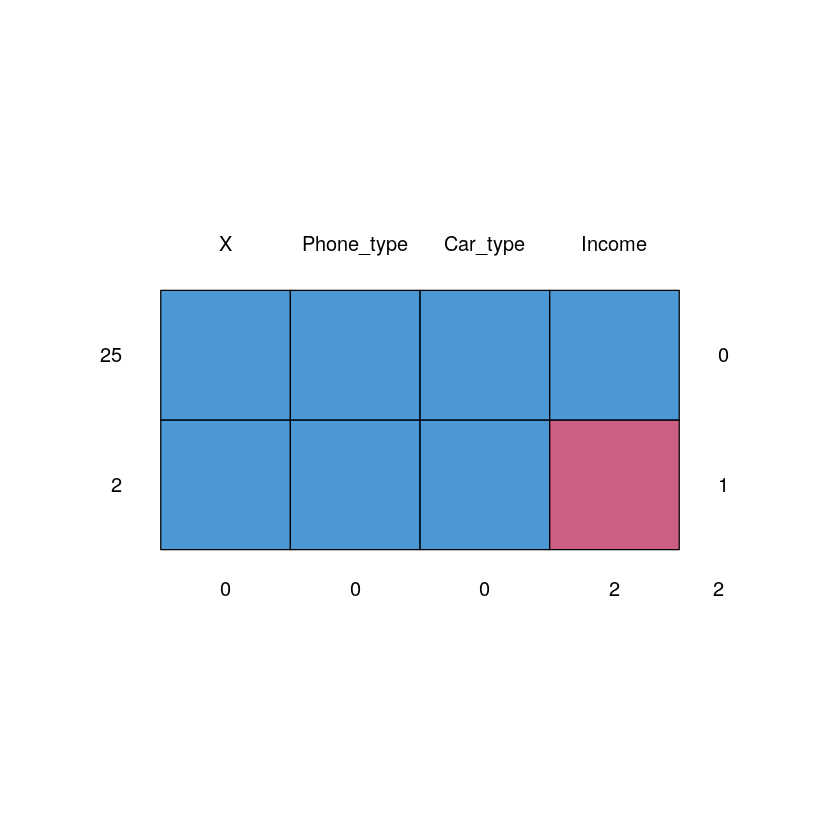

In [126]:
md.pattern(data)


 Variables sorted by number of missings: 
 Variable      Count
      rad 0.07905138
  ptratio 0.07905138
      X.1 0.00000000
        X 0.00000000
     crim 0.00000000
       zn 0.00000000
    indus 0.00000000
     chas 0.00000000
      nox 0.00000000
       rm 0.00000000
      age 0.00000000
      dis 0.00000000
      tax 0.00000000
        b 0.00000000
    lstat 0.00000000
     medv 0.00000000


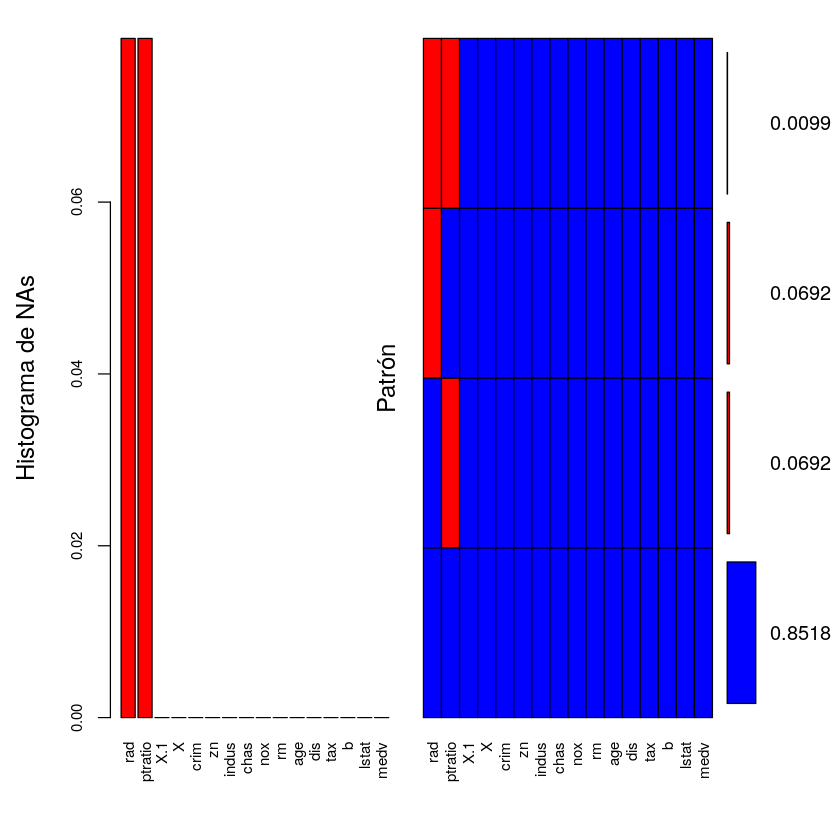

In [123]:
aggr(base,
     col= c('blue', 'red'),
     numbers = TRUE, 
     sortVars = TRUE,
     labels = names(base),
     cex.axis = 0.75,
     gap = 1,
     ylab = c("Histograma de NAs", "Patrón")
) 

## 3. Métodos para tratamientos de NA's: 

### 3.1 Eliminación

Es posible que eliminar los Na, la forma más simple de hacerlo es eliminar todas las filas que contengan algún valor nulo.

In [127]:
ingresos <- na.omit(data)
head(ingresos, 5)

X,Income,Phone_type,Car_type
<int>,<int>,<fct>,<fct>
1,89800,Android,Luxury
2,47500,Android,Non-Luxury
3,45000,iPhone,Luxury
4,44700,,Luxury
5,59500,iPhone,Luxury


In [68]:
ingresos <- data[complete.cases(data),]
head(ingresos, 5)

,X,Income,Phone_type,Car_type
,<int>,<int>,<fct>,<fct>
1,1,89800,Android,Luxury
2,2,47500,Android,Non-Luxury
3,3,45000,iPhone,Luxury
5,5,59500,iPhone,Luxury
7,7,63300,iPhone,Non-Luxury


Aunque tambien existe la opción de eliminar las filas que tengan un valor nulo en una variable concreta.

In [128]:
ingresos <- data[!is.na(data$Income),]
colSums(is.na(ingresos))
head(ingresos, 5)

X     Income Phone_type   Car_type 
         0          0          0          0

X,Income,Phone_type,Car_type
<int>,<int>,<fct>,<fct>
1,89800,Android,Luxury
2,47500,Android,Non-Luxury
3,45000,iPhone,Luxury
4,44700,,Luxury
5,59500,iPhone,Luxury


Támbien existe la posibilidad de que alguna variable tenga tantos NA's que sea más conveniente eliminarla.

In [70]:
ingresos$Income <- NULL
head(ingresos, 5)

X,Phone_type,Car_type
<int>,<fct>,<fct>
1,Android,Luxury
2,Android,Non-Luxury
3,iPhone,Luxury
4,NA,Luxury
5,iPhone,Luxury


### 3.2  Imputación por medias

Reemplazamos los valores faltantes por la media

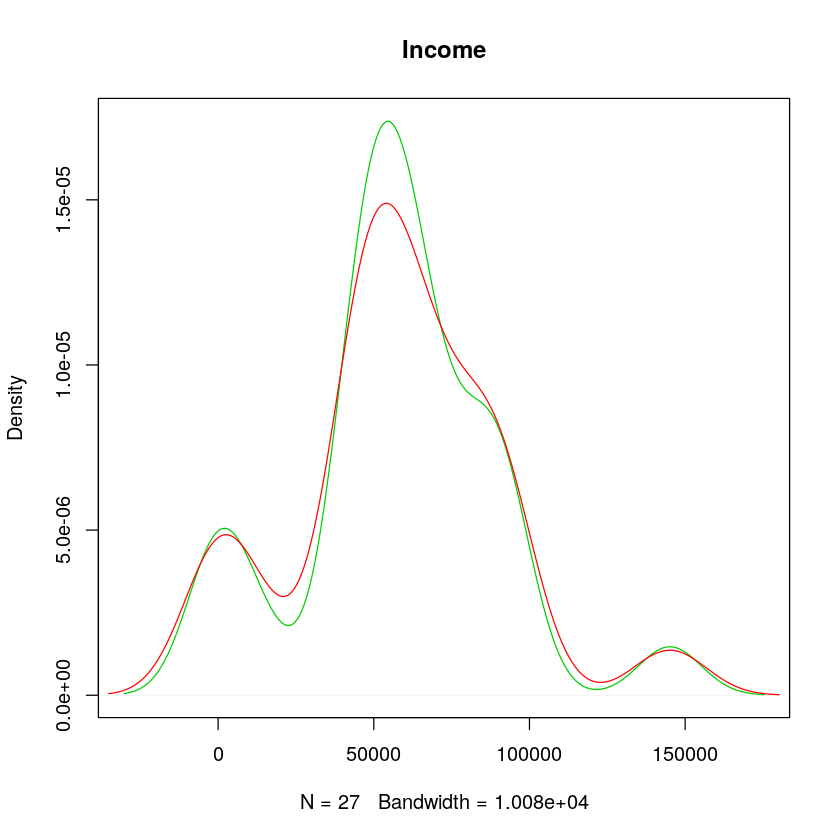

In [129]:
Income_mean <- ifelse(is.na(data$Income), 
                           mean(data$Income, na.rm=TRUE),
                           data$Income
                           )

plot(density(Income_mean),col=3,main="Income")
lines(density(data$Income,na.rm = T),col=2)

La imputación media subestimará la varianza, alterará las relaciones entre las variables, sesgará casi cualquier estimación que no sea la media y sesgará la estimación de la media cuando los datos no sean MCAR.

#### Imputación con paquete `Hmisc`  

In [130]:
housing.data <- base
summary(housing.data$ptratio)
housing.data$ptratio <- impute(housing.data$ptratio, mean)
summary(housing.data$ptratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  12.60   17.40   19.10   18.47   20.20   22.00      40 


 40 values imputed to 18.4676 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   18.60   18.47   20.20   22.00 

También se puede imputar con la mediana y otras medidas

In [131]:
housing.data <- base
housing.data$ptratio <- impute(housing.data$ptratio, median)
summary(housing.data$ptratio)


 40 values imputed to 19.1 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   19.10   18.52   20.20   22.00 

También se puede imputar con un valor fijo

In [132]:
housing.data <- base
housing.data$ptratio <- impute(housing.data$ptratio, 18)
summary(housing.data$ptratio)


 40 values imputed to 18 



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.60   17.40   18.60   18.43   20.20   22.00 

#### Imputación con paquete `mice`

In [133]:
columns <- c("ptratio", "rad")
imputed_data1 <- mice(base[,names(base) %in% columns],m = 1,
  maxit = 1, method = "mean",seed = 2018,print=F)
complete.data <- mice::complete(imputed_data)

* m: Es el número de imputaciones que quiero hacer
* maxit: Es el número maximo de iteraciones
* seed: Es la semilla; todos los métodos de reemplazo del paquete son aleatorios, y la semilla va cambiando si esta no se fija, cambiando así los valores con los que se imputo.
* method: Metodo de reemplazo
    + pmm - comparación predictiva de medias
    + logreg - regresión logistica
    + polyreg - regresión logística politómica
    + polr - modelo de probabilidades proporcionales
    
**nota:** Para generar números pseudo aleatorios se utiliza un generador lineal congruencial

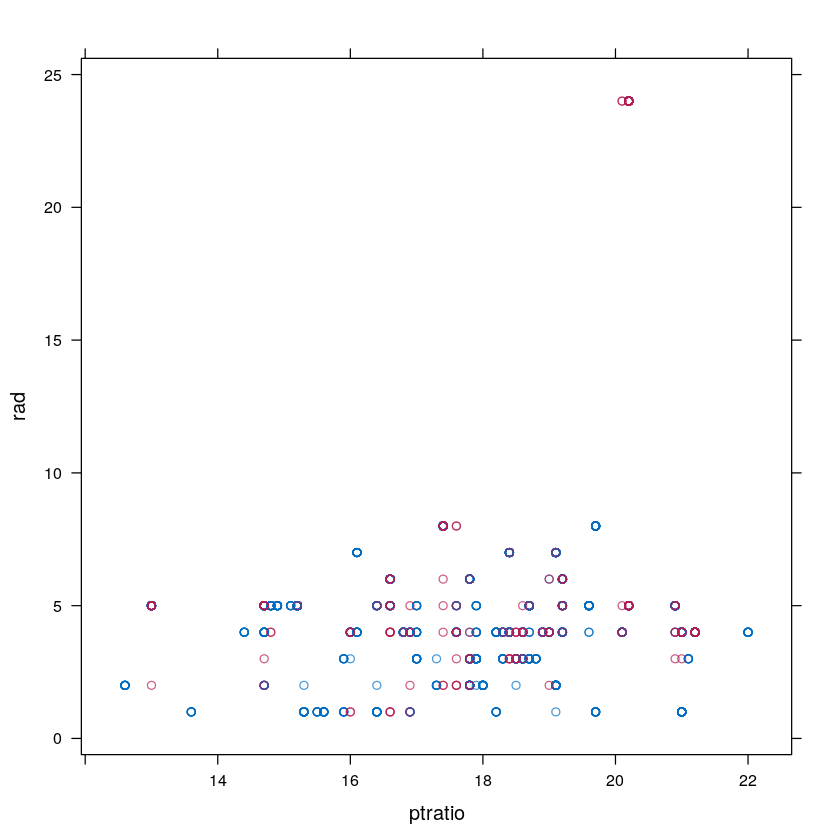

In [134]:
xyplot(imputed_data,rad ~ptratio)

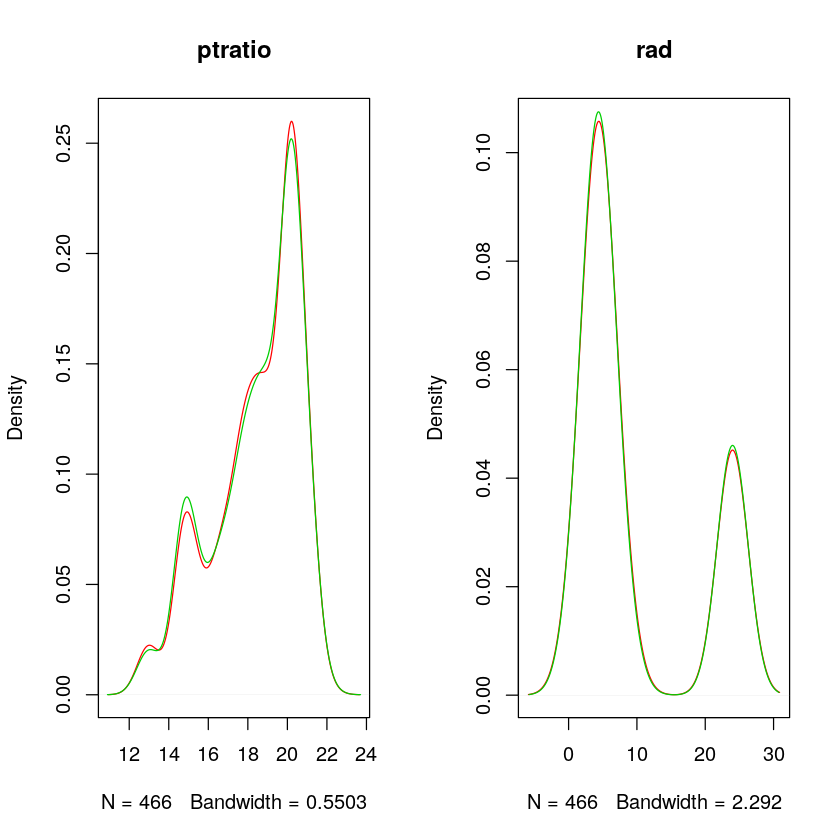

In [135]:
par(mfrow=c(1,2))
plot(density(base$ptratio,na.rm = T),col=2,main="ptratio")
lines(density(complete.data$ptratio),col=3)
plot(density(base$rad,na.rm = T),col=2,main="rad")
lines(density(complete.data$rad),col=3)

### 3.4 Imputación mediante regresión

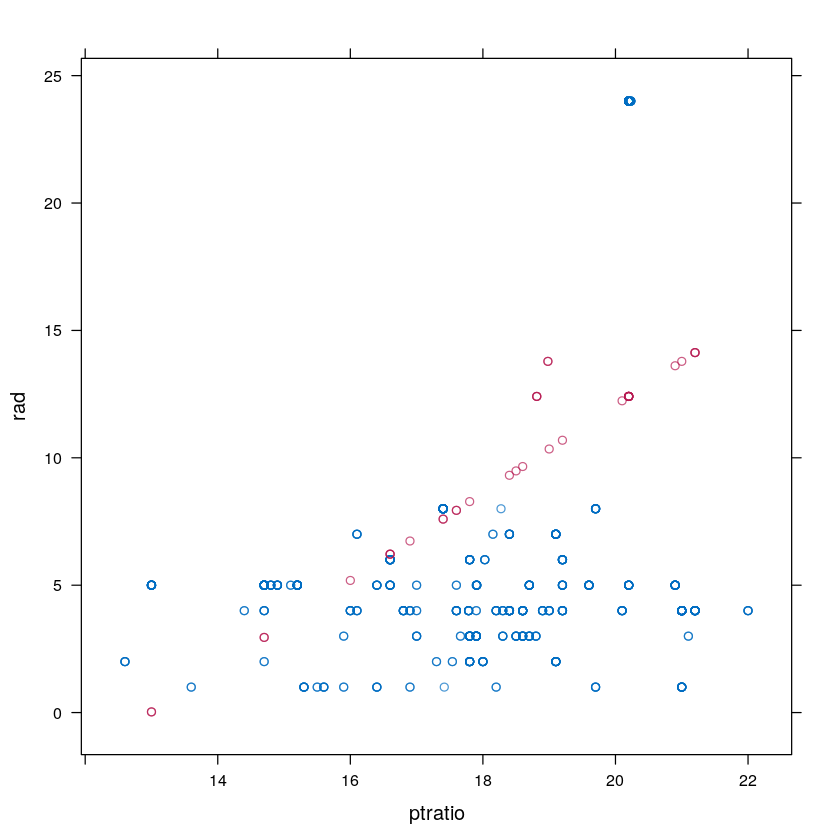

In [136]:
impute_arg1  <- mice(base[,names(base) %in% columns],m = 1,
  maxit = 1, method = "norm.predict",seed = 2018,print=F)

impute_arg <- mice::complete(impute_arg1)
xyplot(impute_arg1,rad ~ptratio)

La imputación por regresión produce estimaciones no sesgadas de las medias bajo MCAR demás, las ponderaciones de regresión son imparciales en el MAR si los factores que influyen en la ausencia son parte del modelo de regresión. Por otro lado, la imputación de regresión fortalece artificialmente las relaciones en los datos. Las correlaciones están sesgadas hacia arriba. La variabilidad está subestimada. Las imputaciones son demasiado buenas para ser verdad. La imputación de regresión es una receta para falsas relaciones positivas y espurias.

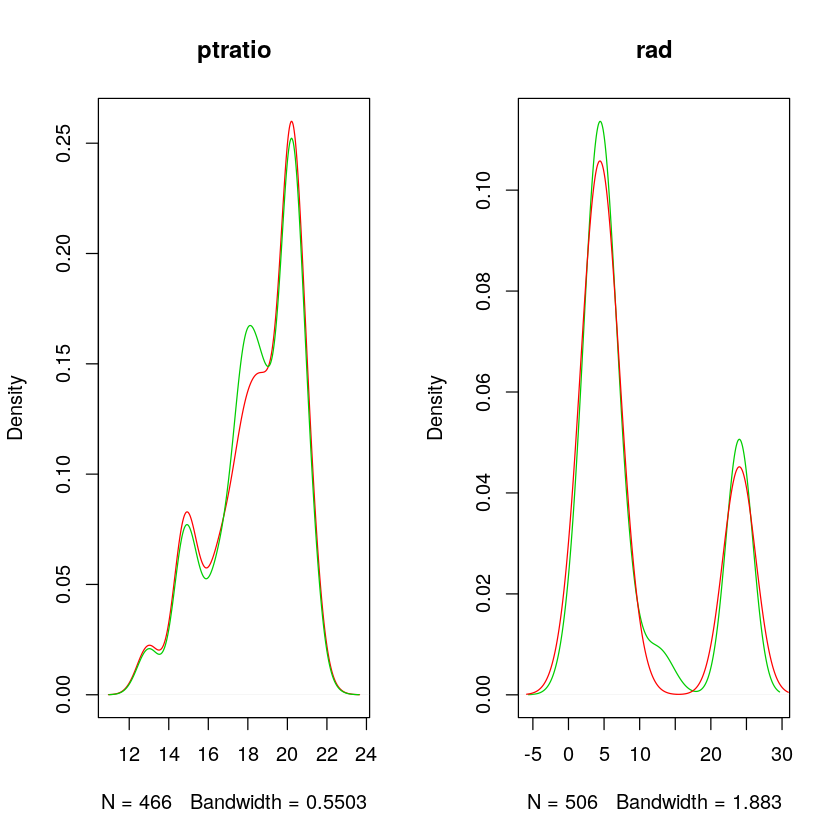

In [85]:
par(mfrow=c(1,2))
plot(density(base$ptratio,na.rm = T),col=2,main="ptratio")
lines(density(impute_arg$ptratio),col=3)
plot(density(impute_arg$rad),col=3,main="rad")
lines(density(base$rad,na.rm = T),col=2)

### 3.5 Imputación mediante regresión estocastica

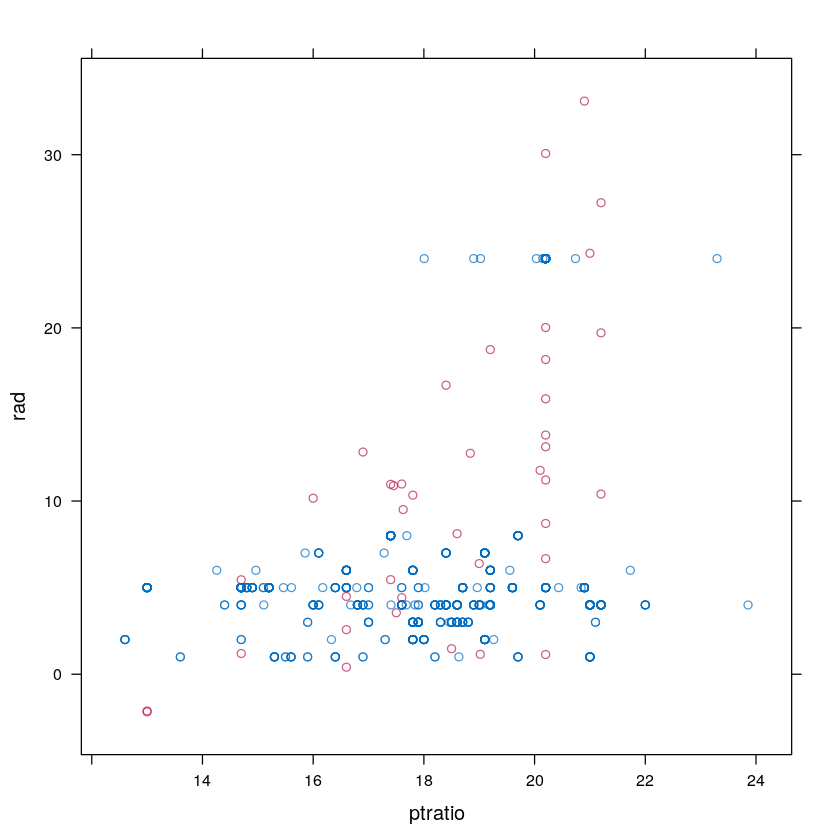

In [86]:
imputed_data1 <- mice(base[,names(base) %in% columns],m = 1,
  maxit = 1, method = "norm.nob",seed = 2018,print=F)
complete.data1 <- mice::complete(imputed_data1)

xyplot(imputed_data1,rad ~ptratio)

Este método primero calcula la intercepción, la pendiente y la varianza residual en el modelo lineal, luego calcula el valor predicho para cada valor faltante y agrega un sorteo aleatorio del residual a la predicción. Una imputación de regresión estocástica bien ejecutada preserva no solo los pesos de regresión, sino también la correlación entre variables .

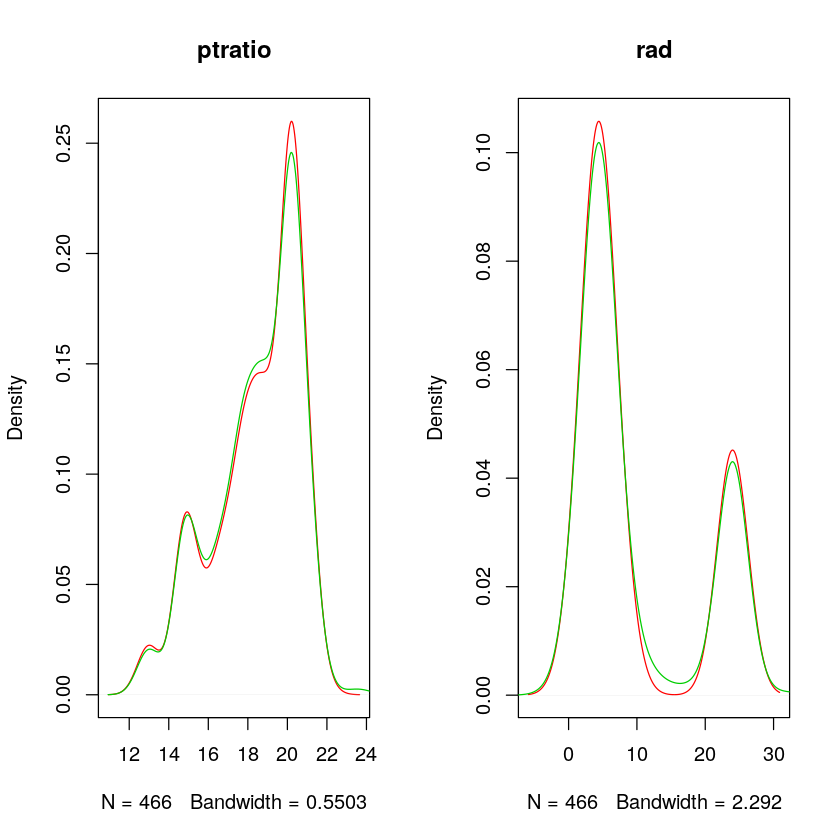

In [87]:
par(mfrow=c(1,2))
plot(density(base$ptratio,na.rm = T),col=2,main="ptratio")
lines(density(complete.data1$ptratio),col=3)
plot(density(base$rad,na.rm = T),col=2,main="rad")
lines(density(complete.data1$rad),col=3)

### 3.6 Imputación por comparación predictiva de medias

Imputa medias condicionadas a valores observados. Un m ́etodo com ́un consisteen  agrupar  los  valores  observados  y  no  observados  en  clases  e  imputar  los  valoresfaltantes por la media de los valores observados en la misma clase.

In [97]:
housing.data <- data.frame(base)
imputed_data <- mice(housing.data[,names(housing.data) %in% columns],
                     m = 5, 
                     maxit = 50, 
                     method = "pmm",
                     seed = 2018)


 iter imp variable
  1   1  rad  ptratio
  1   2  rad  ptratio
  1   3  rad  ptratio
  1   4  rad  ptratio
  1   5  rad  ptratio
  2   1  rad  ptratio
  2   2  rad  ptratio
  2   3  rad  ptratio
  2   4  rad  ptratio
  2   5  rad  ptratio
  3   1  rad  ptratio
  3   2  rad  ptratio
  3   3  rad  ptratio
  3   4  rad  ptratio
  3   5  rad  ptratio
  4   1  rad  ptratio
  4   2  rad  ptratio
  4   3  rad  ptratio
  4   4  rad  ptratio
  4   5  rad  ptratio
  5   1  rad  ptratio
  5   2  rad  ptratio
  5   3  rad  ptratio
  5   4  rad  ptratio
  5   5  rad  ptratio
  6   1  rad  ptratio
  6   2  rad  ptratio
  6   3  rad  ptratio
  6   4  rad  ptratio
  6   5  rad  ptratio
  7   1  rad  ptratio
  7   2  rad  ptratio
  7   3  rad  ptratio
  7   4  rad  ptratio
  7   5  rad  ptratio
  8   1  rad  ptratio
  8   2  rad  ptratio
  8   3  rad  ptratio
  8   4  rad  ptratio
  8   5  rad  ptratio
  9   1  rad  ptratio
  9   2  rad  ptratio
  9   3  rad  ptratio
  9   4  rad  ptratio
  9   5  rad

In [98]:
summary(imputed_data)

Class: mids
Number of multiple imputations:  5 
Imputation methods:
    rad ptratio 
  "pmm"   "pmm" 
PredictorMatrix:
        rad ptratio
rad       0       1
ptratio   1       0


Despues de generar los valores de forma aleatoria, se reemplazan los NA's por los valores generados

In [104]:
housing.data$ptratio <- mice::complete(imputed_data)$ptratio
housing.data$rad <- mice::complete(imputed_data)$rad

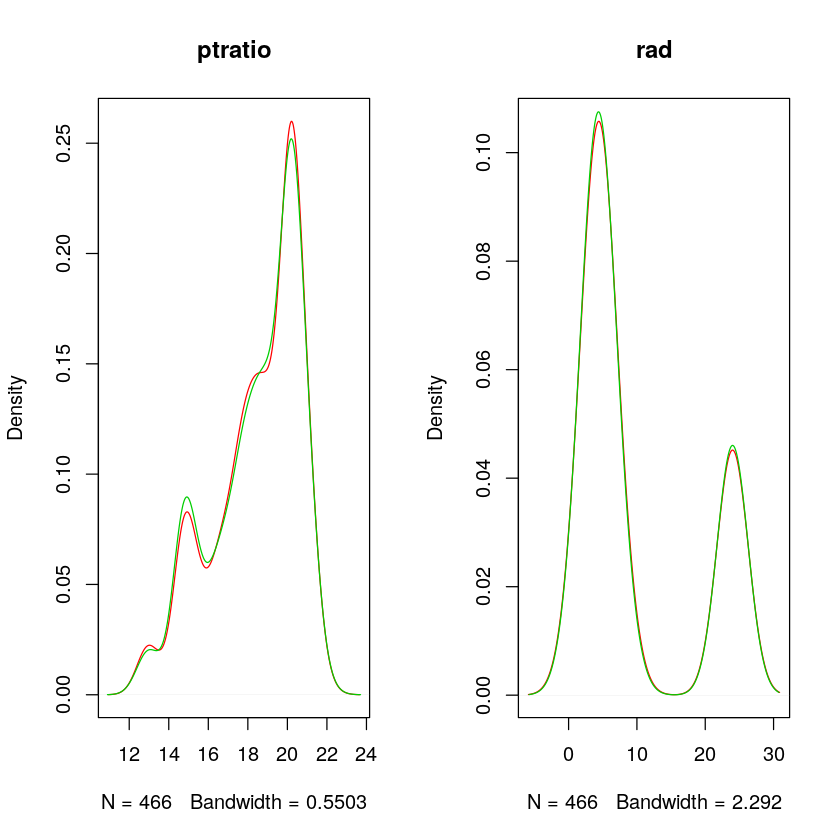

In [94]:
par(mfrow=c(1,2))
plot(density(base$ptratio,na.rm = T),col=2,main="ptratio")
lines(density(housing.data$ptratio),col=3)
plot(density(base$rad,na.rm = T),col=2,main="rad")
lines(density(housing.data$rad),col=3)

### 3.7 Imputación múltiple

La imputación múltiple crea m>1 conjuntos de datos completos. Cada uno de estos conjuntos de datos se analiza mediante un software de análisis estándar. Los m resultados se agrupan en una estimación puntual final más un error estándar al agrupar basado en las reglas (“reglas de Rubin”). La Figura ilustra los tres pasos principales en la imputación múltiple: imputación, análisis y agrupación.

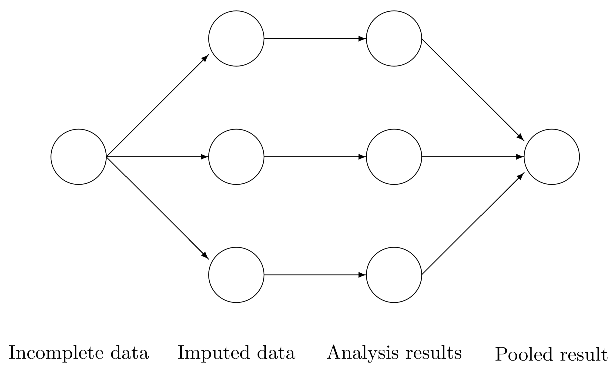

#### Como funciona

+ El análisis comienza con datos observados, incompletos. La imputación múltiple crea varias versiones completas de los datos al reemplazar los valores faltantes por valores de datos plausibles. Estos valores plausibles se extraen de una distribución modelada específicamente para cada entrada faltante.

+ El segundo paso es estimar los parámetros de interés de cada conjunto de datos imputado.

+ El último paso es juntar la m .Las estimaciones de los parámetros en una estimación, y para estimar su varianza.La varianza combina la varianza de muestreo convencional (varianza dentro de la imputación) y la varianza adicional causada por la varianza extra de los datos faltantes causada por los datos faltantes (varianza entre la imputación). Bajo las condiciones apropiadas, las estimaciones agrupadas son insesgadas y tienen las propiedades estadísticas correctas.

**Nota:** La imputación múltiple (Rubin 1987b; Rubin 1996) resuelve el problema de errores estándar “demasiado pequeños”.


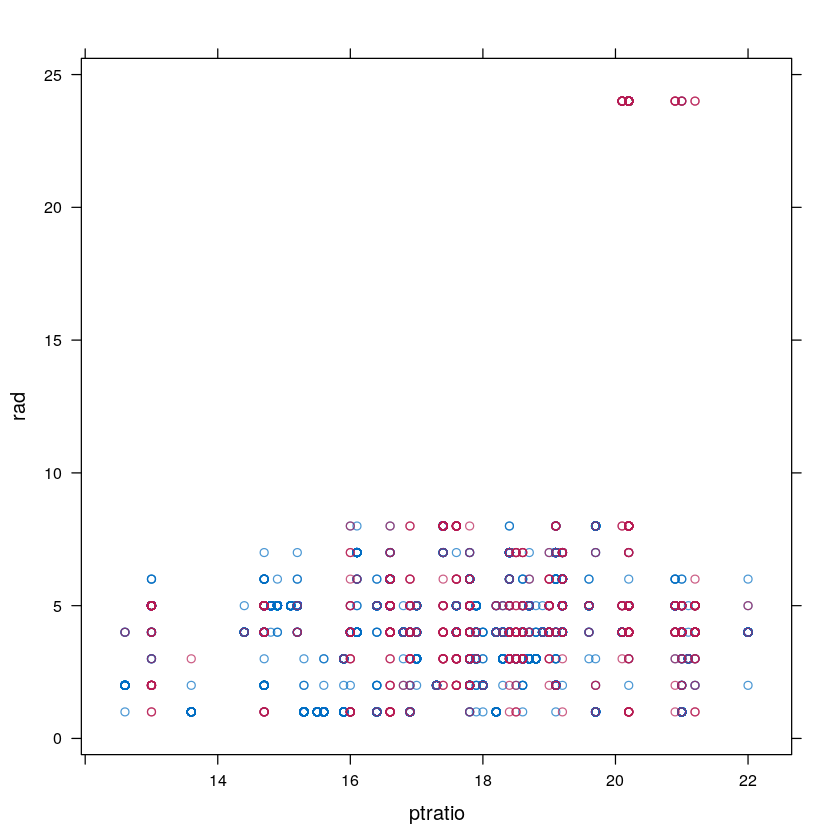

In [138]:
imputed_data3 <- mice(base[,names(base) %in% columns], seed=2018,print = F,
                      m = 30)
complete.data3<- mice::complete(imputed_data3)

xyplot(imputed_data3,rad ~ptratio)

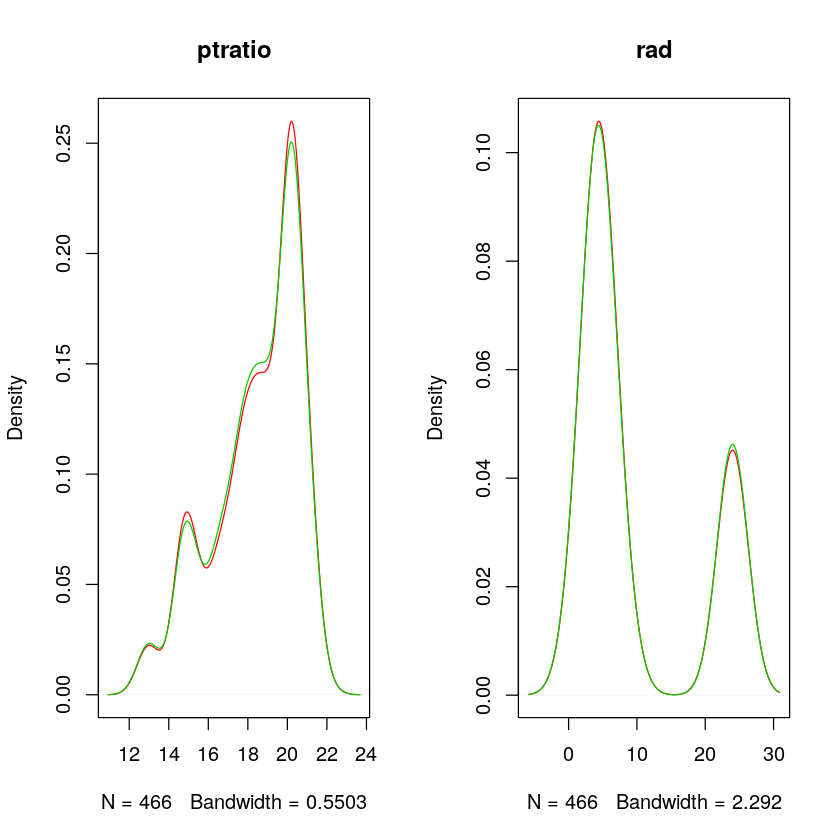

In [139]:
par(mfrow=c(1,2))
plot(density(base$ptratio,na.rm = T),col=2,main="ptratio")
lines(density(complete.data3$ptratio),col=3)
plot(density(base$rad,na.rm = T),col=2,main="rad")
lines(density(complete.data3$rad),col=3)

### 3.8 Imputación por cómputo de valores aleatorios

Se usa cuanto tengo valores faltantes, tanto en variables númericas como categoricas, de forma que por medio de un muestreo aleatorio se reeemplazan los valores faltantes. Para esto es conveniente construir una función.

Primero se se construye un vector con los valores nulos **missing**, luego los sumamos para saber cuales valores hay que reemplazar **n.missing**, luego  se hace un vector de los valores no nulos **x.obs**, **imputed** devuelve por defecto los valores que habian en los valores no nulos y finalmente **imputed[missing]** permite reemplazar aletoriamente los valores nulos con valores observados.

In [121]:
rand.imput = function(x){
    missing <- (is.na(x)) #vector booleano
    n.missing <- sum(missing)#Numero de NA’s
    x.obs <- x[!missing]#Datos no NA
    imputed <- x
    imputed[missing] <- sample(x.obs,n.missing,replace = T)
    return(imputed)
}

complete.data4 <- rand.imput(base$ptratio)
complete.data5 <- rand.imput(base$rad)

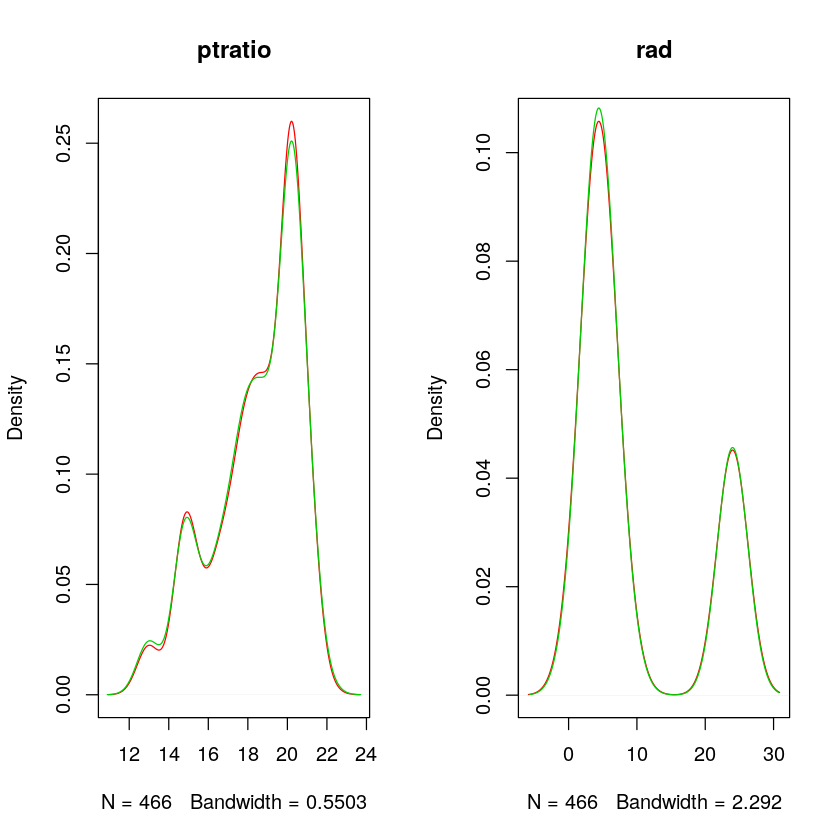

In [122]:
par(mfrow=c(1,2))
plot(density(base$ptratio,na.rm = T),col=2,main="ptratio")
lines(density(complete.data4),col=3)
plot(density(base$rad,na.rm = T),col=2,main="rad")
lines(density(complete.data5),col=3)

In [197]:
data$Phone_type <- factor(data$Phone_type)
data$complete <- rand.imput(data$Phone_type)

table(data$complete)
table(data$Phone_type)


Android  iPhone 
     10      17 


Android  iPhone 
     10      15 

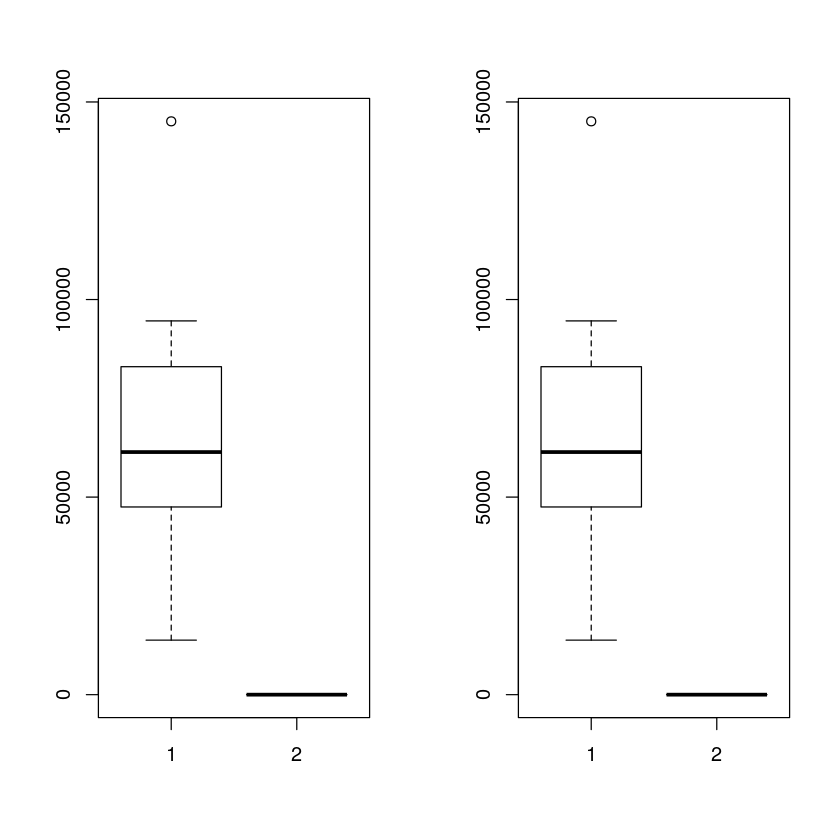

In [200]:
par(mfrow=c(1,2))
boxplot(data$Income, data$Phone_type)
boxplot(data$Income, data$complete)

### 3.9 Imputación automática

Es posible utilizar el paquete **hmisc** para que este elija de forma automatica el método e impute los NA's.

In [173]:
impute_arg <- aregImpute(~ptratio + rad, data = housing.data, n.impute = 3)

Iteration 3 


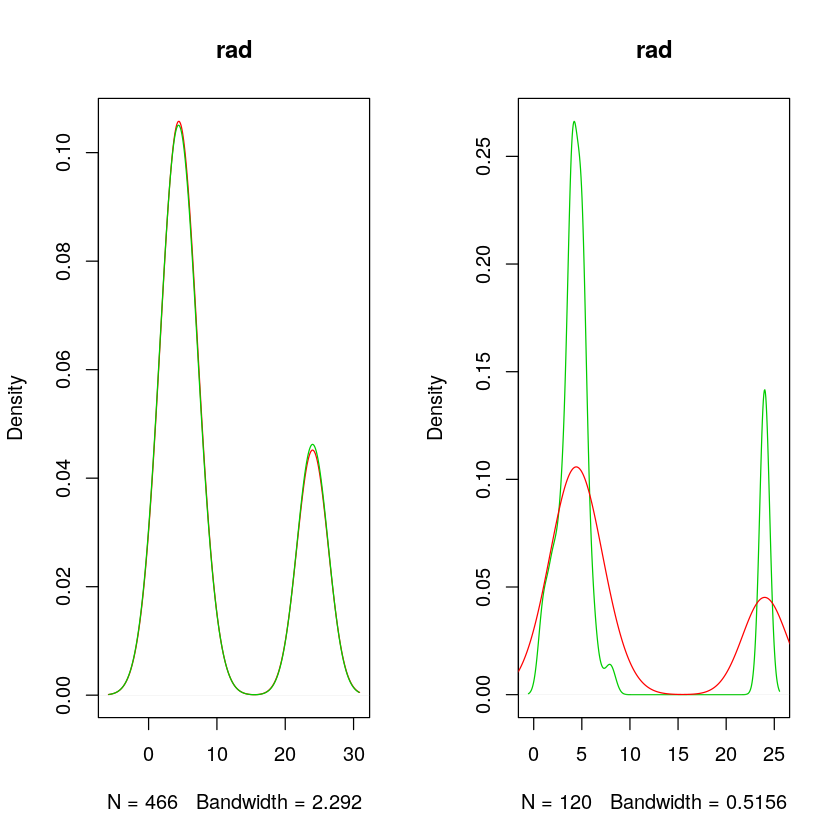

In [179]:
par(mfrow=c(1,2))
plot(density(base$rad,na.rm = T),col=2,main="rad")
lines(density(complete.data3$rad),col=3)
plot(density(impute_arg$imputed$rad),col=3,main="rad")
lines(density(base$rad,na.rm = T),col=2)

## 4. Tratamiento de valores duplicados

En ocasiones encontramos valores duplicados, o registros duplicados en una valiable, lo primero es verificar si hay registros duplicados en el data frame.

In [32]:
family.salary <- c(40000, 60000, 50000, 80000, 60000, 70000, 60000)
family.size   <- c(4, 3, 2, 2, 3, 4, 3)
family.car    <- c("Lujo", "Compacto", "Utilitario", "Lujo", 
               "Compacto", "Compacto", "Compacto")
family        <- data.frame(family.salary, family.size, family.car)
family

family.salary,family.size,family.car
<dbl>,<dbl>,<fct>
40000,4,Lujo
60000,3,Compacto
50000,2,Utilitario
80000,2,Lujo
60000,3,Compacto
70000,4,Compacto
60000,3,Compacto


In [44]:
duplicated(family)
family[duplicated(family),]

[1] FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE

,family.salary,family.size,family.car
5,60000,3,Compacto
7,60000,3,Compacto


Ahora cuando se encuentran valores duplicados en un data frame, estos se pueden eliminar utilizando la función unique.

In [33]:
family.unique <- unique(family)
family.unique

,family.salary,family.size,family.car
,<dbl>,<dbl>,<fct>
1,40000,4,Lujo
2,60000,3,Compacto
3,50000,2,Utilitario
4,80000,2,Lujo
6,70000,4,Compacto


## 5. Tratamiento de Outliers

En estadistica se conoce como *rango intercuartilico* $RI$ a la distancia que hay entre el cuartil uno $Q_1$ y el cuartil tres $Q_3$, y se considera un outlier un dato que este por fuera de $[Q_1-1.5RI, Q_3+1.5RI]$.

## 5. Tratamiento de Outliers: Identificación

Para identificar si hay valores atípicos en un grupo de datos, una de las herramientas más útilies es el uso de boxplots.

In [34]:
data3R     <- read.csv("ozone.csv", stringsAsFactors=F)
ozone.data <- data3R
head(ozone.data, 5)

X,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
1,1,1,4,3.01,5480,8,20,NA,NA,5000,-15,30.56,200
2,1,2,5,3.20,5660,6,NA,38,NA,NA,-14,NA,300
3,1,3,6,2.70,5710,4,28,40,NA,2693,-25,47.66,250
4,1,4,7,5.18,5700,3,37,45,NA,590,-24,55.04,100
5,1,5,1,5.34,5760,3,51,54,45.32,1450,25,57.02,60


[1] 5480 5410 5350 5480 5490 5470 5320 5420 5440 5480 5450 5500

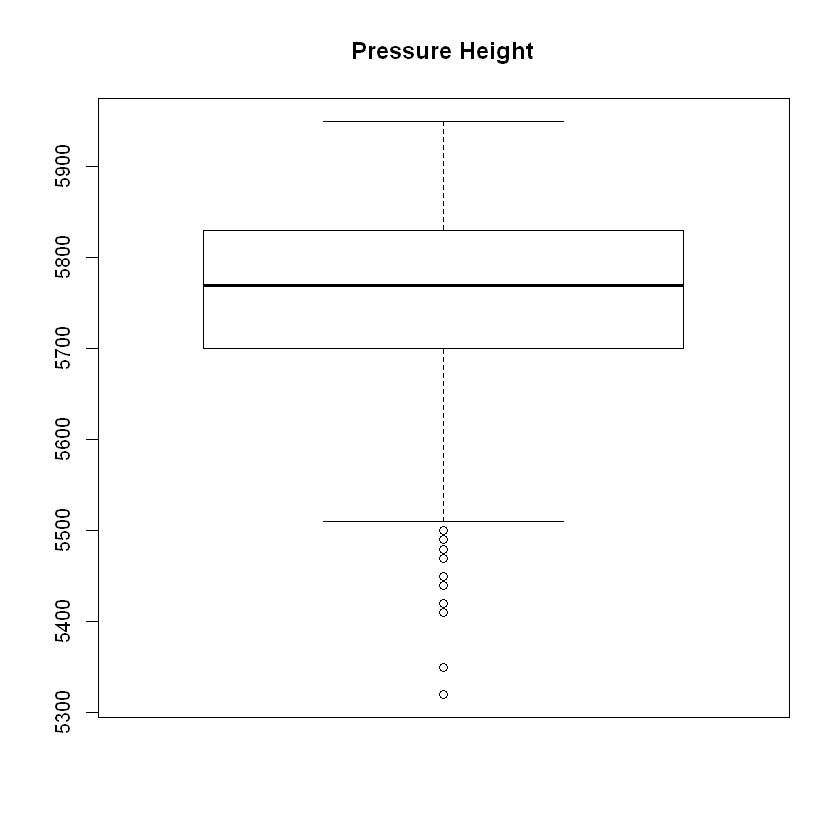

In [47]:
boxplot(ozone.data$pressure_height, 
        main = "Pressure Height",
        boxwex = 1.5)$out

El parametro out se utiliza para que aparezca cuales son las observaciones que son outliers en la variable analizada.

En ocasiones es importante observar si los outlaiers tienen relación con otra variable.

[1] 11.06  9.93 22.89 24.29 29.79

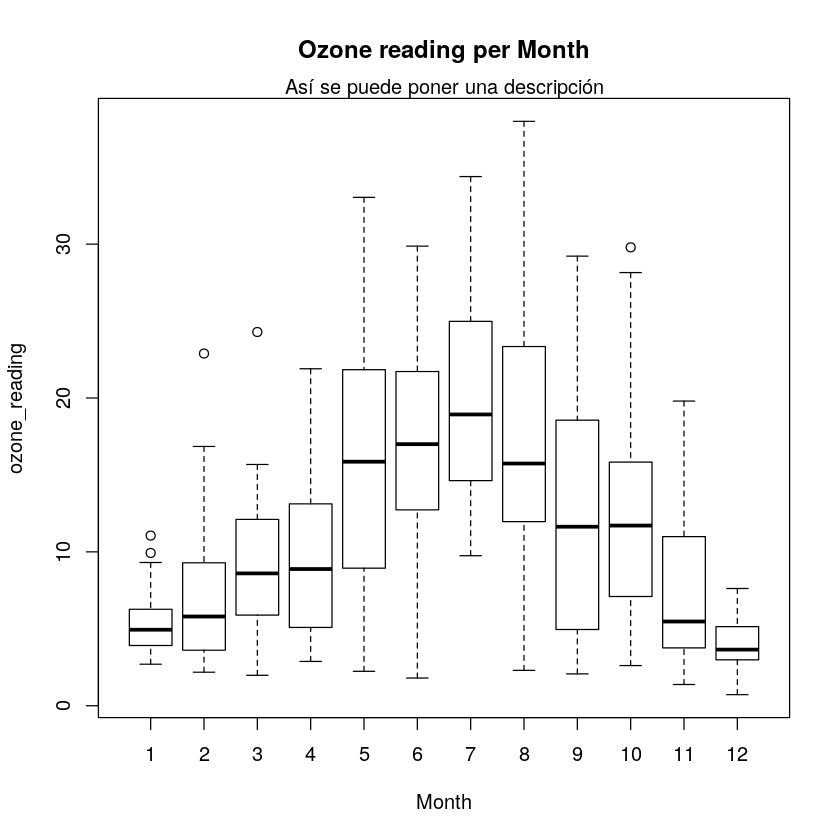

In [35]:
boxplot(ozone_reading ~Month,
        data = ozone.data,
        main = "Ozone reading per Month")$out

mtext("Así se puede poner una descripción")

## 5. Tratamiento de Outliers: Imputación de datos atípicos

Creamos una función para imputarlos

In [36]:
replace_outliers <- function(x, removeNA=TRUE){
    q1   <- quantile(x,probs=0.25, na.rm=removeNA)
    q3   <- quantile(x,probs=0.75, na.rm=removeNA)
    ri   <- q3 - q1   
    caps <- quantile(x, probs = c(.05, .95), na.rm = removeNA)  
    x[x<q1-1.5 * ri] <- caps[1]
    x[x>q3+1.5 * ri] <- caps[2]
    x
    }

In [37]:
capped_pressure_height <- replace_outliers(ozone.data$pressure_height)
head(capped_pressure_height,5)

[1] 5550 5660 5710 5700 5760

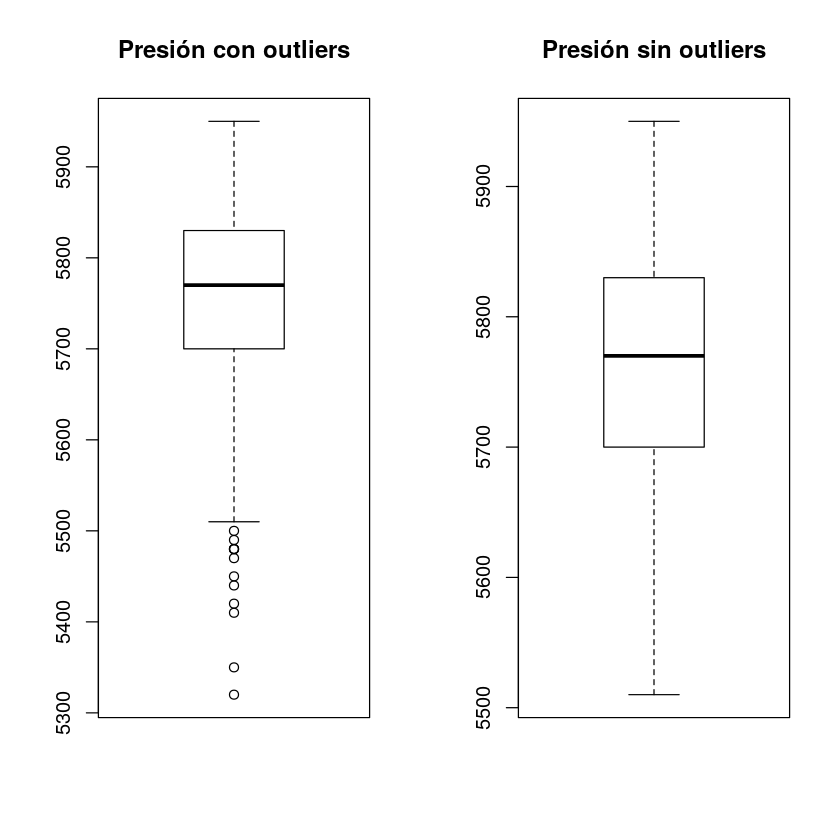

In [39]:
par(mfrow = c(1,2))
boxplot(ozone.data$pressure_height, main = "Presión con outliers")
boxplot(capped_pressure_height, main = "Presión sin outliers")

### Referencias

[Buuren S. (2018). *Flexible imputation of missing data*. Second Edition. Editorial CRC Press.](https://stefvanbuuren.name/fimd/)

[Marín Y. (2018). *imputación de datos*](http://rpubs.com/ydmarinb/429757)

[Otero D. (2011).*Imputación de datos faltantes en un Sistemade Información sobre Conductas de Riesgo*. Universidad de Coruña](http://eio.usc.es/pub/mte/descargas/ProyectosFinMaster/Proyecto_616.pdf)